In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import cv2 as cv

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train.shape

170500096/170498071 [==============================] - 11s 0us/step


(50000, 32, 32, 3)

In [ ]:
y_train.shape, x_test.shape

((50000, 1), (10000, 32, 32, 3))

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
y_train[:5], y_test[:5]

(array([6, 9, 9, 4, 1], dtype=uint8), array([3, 8, 8, 0, 6], dtype=uint8))

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def show_image(x, y, index):
  plt.figure(figsize=(15,2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

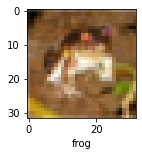

In [ ]:
show_image(x_train, y_train, 0)

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
])

In [ ]:
# genarator = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=45,
#     horizontal_flip=True,
#     vertical_flip=True,
#     zoom_range=0.2,
#     shear_range=0.1,
#     fill_mode='reflect'
# )

In [ ]:
# from sklearn.model_selection import train_test_split
# _, x_validation, _, y_validation = train_test_split(x_train, y_train, test_size=0.2)

In [ ]:
model = models.Sequential([
        data_augmentation,
        layers.Conv2D(filters=64, kernel_size=(3,3), padding='same',
                      activation='relu', input_shape=(32,32,3)),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(filters=128, kernel_size=(3,3), padding='same',
                      activation='relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(filters=256, kernel_size=(3,3), padding='same',
                      activation='relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),
        #kernel_regularizer=keras.regularizers.l2(0.001)
        layers.Dense(256, activation='relu'),
        #layers.Dropout(0.3),
        layers.Dense(128, activation='relu'),
        #layers.Dropout(0.3),
        layers.Dense(10, activation='softmax')
])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=30, validation_split=0.1, shuffle=1)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4930: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


1407/1407 [==============================] - 49s 13ms/step - loss: 1.6108 - accuracy: 0.4109 - val_loss: 1.4016 - val_accuracy: 0.5000
Epoch 2/30
1407/1407 [==============================] - 17s 12ms/step - loss: 1.2760 - accuracy: 0.5449 - val_loss: 1.1606 - val_accuracy: 0.5980
Epoch 3/30
1407/1407 [==============================] - 17s 12ms/step - loss: 1.1284 - accuracy: 0.6024 - val_loss: 0.9934 - val_accuracy: 0.6528
Epoch 4/30
1407/1407 [==============================] - 17s 12ms/step - loss: 1.0433 - accuracy: 0.6323 - val_loss: 0.9439 - val_accuracy: 0.6674
Epoch 5/30
1407/1407 [==============================] - 17s 12ms/step - loss: 0.9809 - accuracy: 0.6527 - val_loss: 0.9405 - val_accuracy: 0.6736
Epoch 6/30
1407/1407 [==============================] - 17s 12ms/step - loss: 0.9325 - accuracy: 0.6734 - val_loss: 0.9276 - val_accuracy: 0.6914
Epoch 7/30
1407/1407 [==============================] - 17s 12ms/step - loss: 0.8885 - accuracy: 0.6889 - val_loss: 0.9560 - val_accura

In [ ]:
# genarator.flow(x_test)[0]


In [ ]:
# model.fit_generator(genarator.flow(x_test, y_test), epochs=25)

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.7826 - accuracy: 0.7561


[0.7825875282287598, 0.7560999989509583]

In [ ]:
from sklearn.metrics import classification_report
pred = [np.argmax(i) for i in model.predict(x_test)]
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78      1000
           1       0.84      0.89      0.86      1000
           2       0.79      0.63      0.70      1000
           3       0.68      0.47      0.56      1000
           4       0.77      0.69      0.72      1000
           5       0.62      0.72      0.67      1000
           6       0.72      0.86      0.79      1000
           7       0.77      0.81      0.79      1000
           8       0.90      0.81      0.85      1000
           9       0.73      0.86      0.79      1000

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.75     10000
weighted avg       0.76      0.76      0.75     10000



In [ ]:
prediction = [classes[i] for i in pred]
prediction[:5]

['dog', 'ship', 'ship', 'airplane', 'frog']

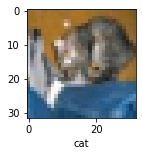

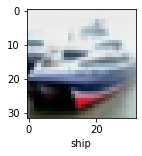

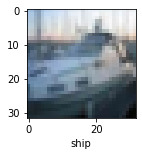

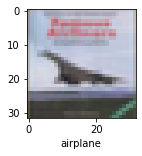

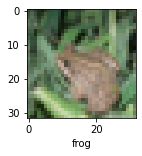

In [ ]:
for i in range(5):
  show_image(x_test, y_test, i)

In [ ]:
x_test[0].shape

(32, 32, 3)

In [ ]:
def prepare_test_image(path):
  img = cv.imread(path)
  img = cv.resize(img, (32,32))
  img = img.reshape(-1, 32, 32, 3)
  img.shape
  return img

In [ ]:
img = prepare_test_image('gdrive/MyDrive/Colab Notebooks/Dataset/truck3.jpg')
#plt.imshow(img, cmap='gray')

In [ ]:
classes[np.argmax(model.predict(img))]

'truck'